# Let's Play
### #Google Play Store
---
## Did u pay for this?

In [1]:
#googleplaystore.csv
# Importar bibliotecas en esta celda
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7086,CA Lottery Official App,FAMILY,4.2,7000,26M,"1,000,000+",Free,0,Teen,Entertainment,"August 2, 2018",3.0.2,4.4 and up
47,Little Teddy Bear Colouring Book Game,ART_AND_DESIGN,4.2,85,8.0M,"100,000+",Free,0,Everyone,Art & Design,"December 17, 2017",2.0.0,4.1 and up
10424,First Hawaiian Bank Mobile,FINANCE,2.1,232,29M,"10,000+",Free,0,Everyone,Finance,"May 9, 2018",18.1.79,5.0 and up
5452,AP Mobile,FAMILY,4.6,117,13M,"10,000+",Free,0,Everyone,Education,"November 21, 2017",1.03,6.0 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up


In [4]:
initial_shape, aux = df.shape
print("Cantidad de registros: {}".format(initial_shape))

Cantidad de registros: 10841


In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Content Rating,1,0.009224
Type,1,0.009224
Last Updated,0,0.000000


In [8]:
df.dropna(how ='any', inplace = True)

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [10]:
change_shape, aux = df.shape
print("Cantidad de registros actuales   : {} \nCantidad de registros descartados: {}".
      format(change_shape, initial_shape - change_shape))

Cantidad de registros actuales   : 9360 
Cantidad de registros descartados: 1481


In [11]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [12]:
df.drop_duplicates(subset='App', inplace=True)

# Categorias?
---
#### La categoria importa?

/home/rodixxi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


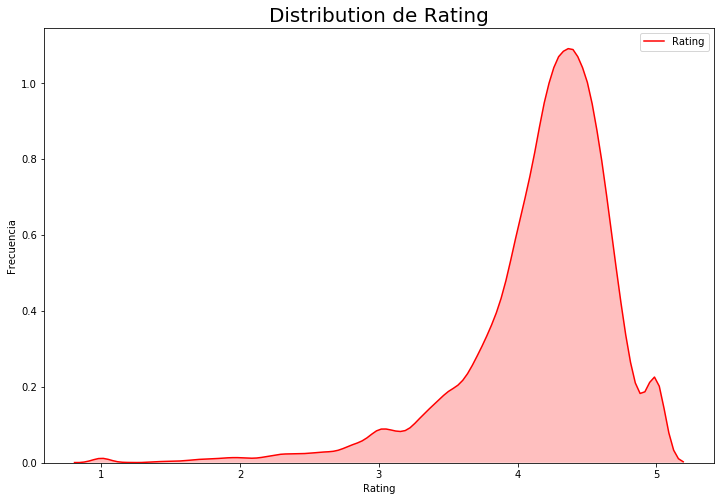

In [13]:
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frecuencia")
plt.title('Distribution de Rating',size = 20);

In [14]:
print("{} categorias".format(len(df['Category'].unique())))
print("\n{}".format(df['Category'].unique()))

33 categorias

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


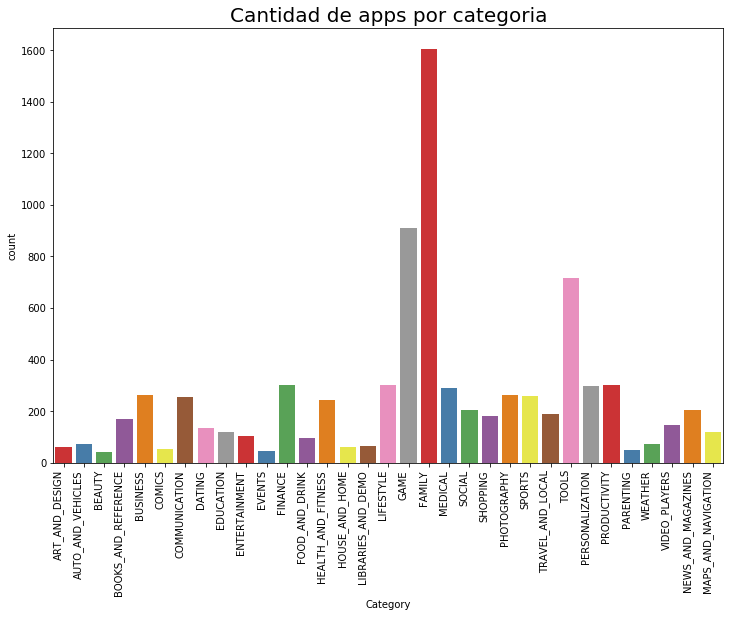

In [15]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Cantidad de apps por categoria',size = 20);

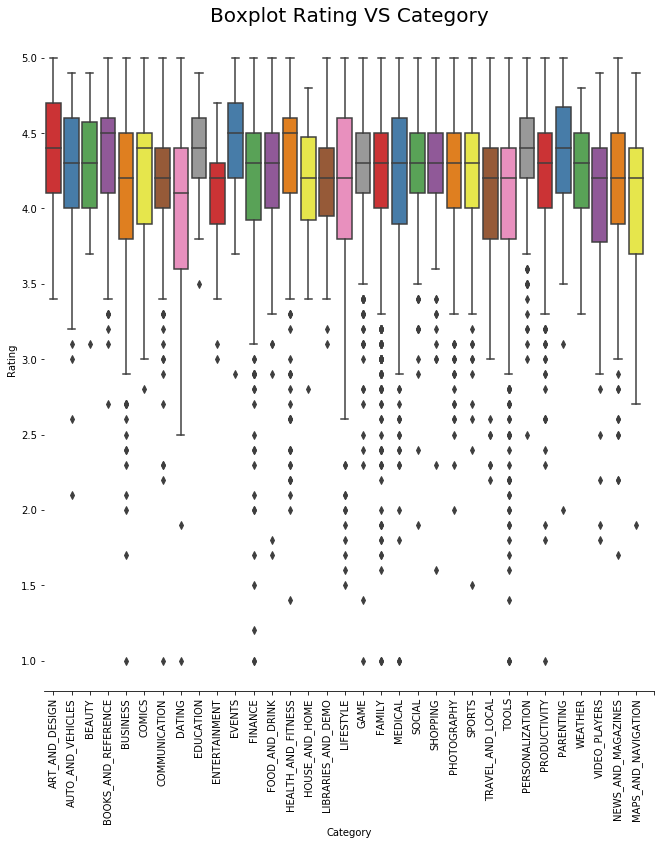

In [16]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot Rating VS Category',size = 20);

# Paid or Arr?
#### A pirate I wanna be... 

/home/rodixxi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


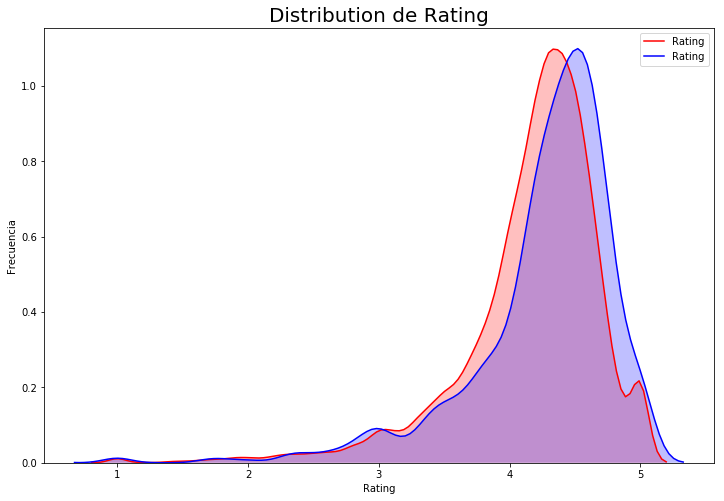

In [17]:
g = sns.kdeplot(df[df['Type'] == 'Free'].Rating, color="Red", shade = True)
g = sns.kdeplot(df[df['Type'] == 'Paid'].Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frecuencia")
plt.title('Distribution de Rating',size = 20);

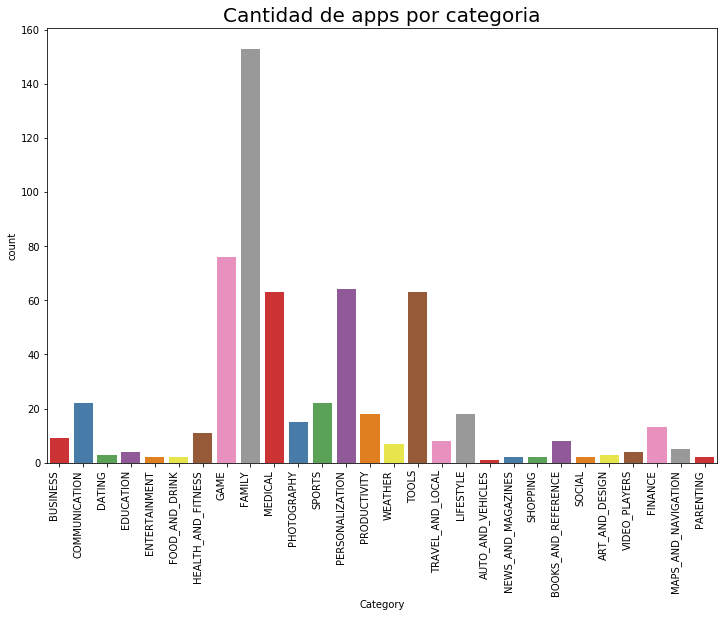

In [18]:
g = sns.countplot(x="Category",data=df[df['Type'] == 'Paid'], palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Cantidad de apps por categoria',size = 20);

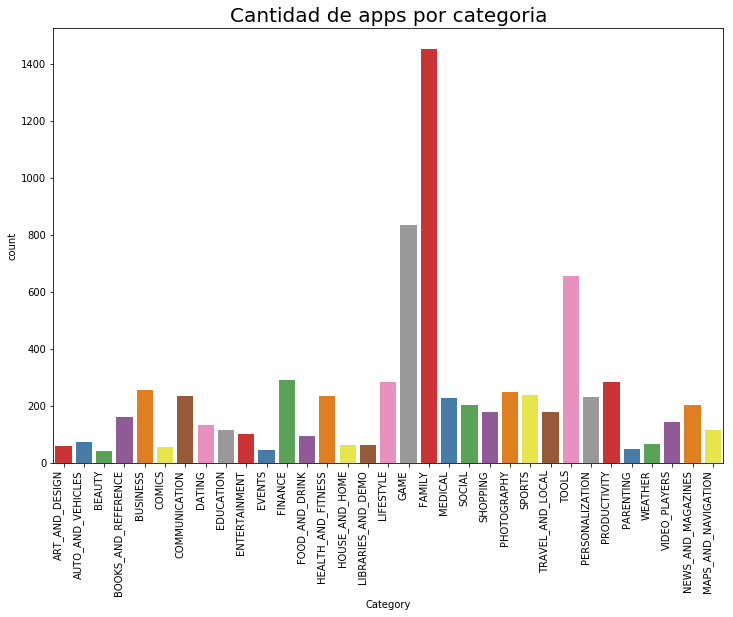

In [19]:
g = sns.countplot(x="Category",data=df[df['Type'] == 'Free'], palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Cantidad de apps por categoria',size = 20);

In [20]:
df_aux = df[(df["Category"] == "GAME") |
           (df["Category"] == "FAMILY") |
           (df["Category"] == "TOOLS") |
           (df["Category"] == "PERSONALIZATION")|
           (df["Category"] == "MEDICAL")]

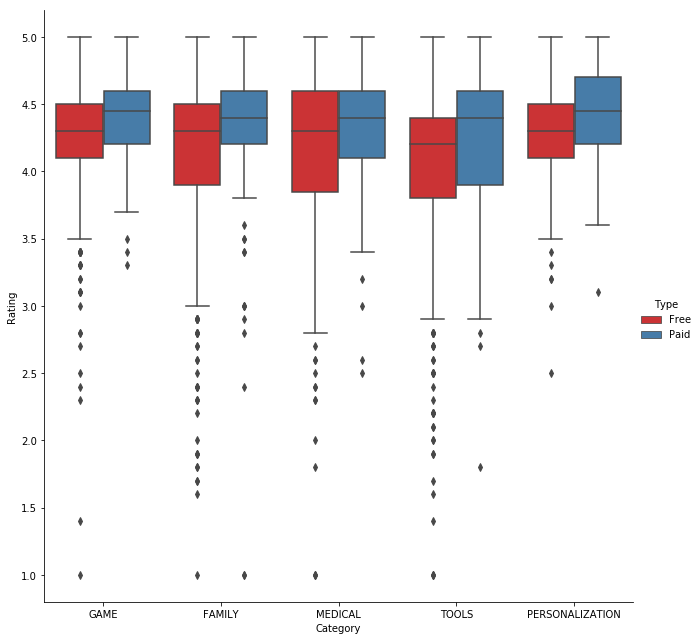

In [21]:
sns.catplot(x="Category",y="Rating",data=df_aux, kind="box", palette="Set1", hue='Type', height=9);

In [22]:
# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
#print(type(df['Installs'].values))

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

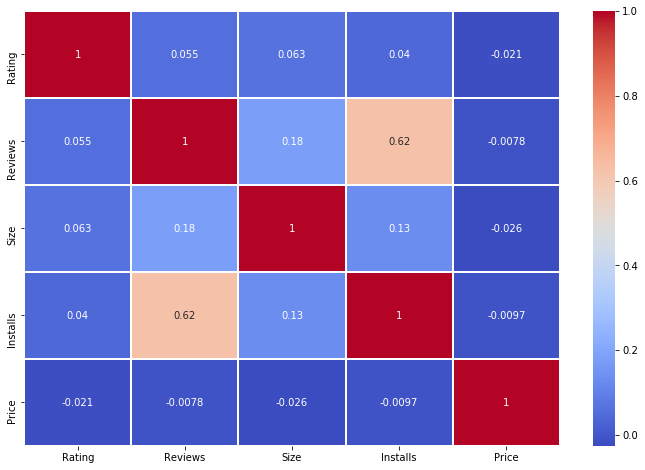

In [23]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linecolor="white", linewidths=1);

![SegmentLocal](giphy.gif "segment")